# LLM Agent Orchestration with Retrieval and Action Framework

LLM agent orchestration refers to the process of managing and coordinating the interactions between a language model (LLM) and various tools, APIs, or processes to perform complex tasks within AI systems. It involves structuring workflows where an AI agent, powered by artificial intelligence, acts as the central decision-maker or reasoning engine, orchestrating its actions based on inputs, context, and outputs from external systems. Using an orchestration framework, LLMs can seamlessly integrate with APIs, databases, and other AI applications, enabling functionalities such as chatbots and automation tools. Open-source agent frameworks further enhance the adaptability of these systems, making LLMs more effective in real-world scenarios.

Many people misunderstand the difference between [LLM Orchestration](https://www.ibm.com/think/topics/llm-orchestration) and LLM Agent Orchestration. Below is a table that highlights the key differences:

![LLM-Agent-Orchestration-Framework](./images/LLM-agent-orchestration.png)

In this tutorial, you will learn how to build an autonomous agent powered by Large Language Models (LLMs), using IBM’s Granite model and LangChain. We’ll explore how agents leverage key components such as memory, planning, and action to perform intelligent tasks. You’ll also implement a practical system that processes text from a book, answers queries dynamically, and evaluates its performance using accuracy metrics like BLEU, Precision, Recall, and F1 Score. 

# Framework for LLM-Based Autonomous Agents

The framework presented in figure-1 provides a holistic design for Large Language Model (LLM)-based autonomous agents, emphasizing the interplay between key components: Profile, Memory, Planning, and Action. Each component represents a critical stage in building an autonomous agent capable of reasoning, decision-making, and interacting with dynamic environments.[1]

![LLM-Agent-Orchestration-Framework](./images/llm-agent-orchestration-1.png)

1. Profile: Defining the Agent’s Identity

The profile gives the agent its identity by embedding information like demographics, personality traits, and social context. This ensures the agent can interact in a personalized way. Profiles can be manually crafted, generated by Gen AI models like [IBM® Granite™ models](https://www.ibm.com/products/watsonx-ai/foundation-models) or OpenAI’s GPT (generative pre-trained transformer), or aligned with specific datasets to meet task requirements. Leveraging prompt engineering, profiles can be dynamically refined to optimize responses. Additionally, within multi-agent orchestration, the profile helps define roles and behaviors, ensuring seamless coordination across AI algorithms and decision-making systems.

2. Memory: Storing and Using Context

Memory helps the agent retain and retrieve past interactions, enabling contextual responses. It can be unified (all data in one place) or hybrid (structured and unstructured). Operations like reading, writing, and reflection allow the agent to learn from experience and provide consistent, informed outputs. Well-structured memory enhances multi-agent orchestration by ensuring that different agents, including specialized agents designed for a specific task, can share and retrieve relevant data efficiently. In frameworks like AutoGen and Crew AI, memory plays a crucial role in maintaining continuity within the ecosystem of collaborating agents, ensuring seamless coordination and optimized task execution.

3. Planning: Strategizing Actions

The planning component lets the agent devise strategies to achieve goals. It can follow predefined steps or adapt dynamically based on feedback from the environment, humans, or the LLM itself. By integrating AI algorithms and leveraging a knowledge base, planning can be optimized to improve reasoning efficiency and problem-solving accuracy. In LLM applications, planning plays a crucial role in ensuring natural language understanding and decision-making processes align with the agent's objectives. Additionally, retrieval-augmented techniques enhance the agent's ability to access relevant information dynamically, improving response accuracy. This flexibility ensures the agent remains effective in changing scenarios, especially in multi-agent orchestration, where various agents coordinate their plans to achieve complex objectives while maintaining scalability for handling large and diverse tasks.

4. Action: Executing Decisions

Actions are the agent’s way of interacting with the world, whether by completing tasks, gathering information, or communicating. It uses memory and planning to guide execution, employs tools when needed, and adapts its internal state based on results for continuous improvement. Optimizing the action execution algorithm ensures efficiency, especially when integrating GPT-powered reasoning models and Gen AI techniques for real-time decision-making.

By combining these components, the framework transforms LLMs into adaptable agents capable of reasoning, learning, and performing tasks autonomously. This modular design makes it ideal for applications like customer service, research assistance, and creative problem-solving.

# Use Case: Building a Queryable Knowledge Agent

This tutorial demonstrates the creation of a Queryable Knowledge Agent designed to process large text documents (like books) and answer user queries accurately. Using IBM’s Granite LLM and LangChain, the agent is built following the principles outlined in the framework for LLM-based autonomous agents. The framework's components align seamlessly with the agent's workflow to ensure adaptability and intelligent responses.

**Let's understand how the framework applies in our use case.** 

![LLM-Agent-Orchestration-Framework](./images/llm-agent-orchestration-2.png)

**Profile:**
The agent is designed with a "knowledge assistant" profile, focusing on summarization, question answering, and reasoning tasks. Its context is personalized to process a specific document (e.g., The Adventures of Sherlock Holmes).

**Memory:**
The agent employs hybrid memory by embedding chunks of the book into a FAISS vector store. This allows it to retrieve relevant context dynamically during queries. Memory operations like reading (retrieval) and writing (updating embeddings) ensure the agent can adapt to new queries over time.

**Planning:**
Query resolution involves single-path reasoning. The agent retrieves relevant chunks of text, generates answers using IBM’s Granite LLM, and evaluates the output for accuracy. Planning without feedback ensures simplicity, while the system’s modularity allows feedback loops to be incorporated in future iterations.

**Action:**
The agent executes query resolution by integrating memory retrieval and LLM processing. It completes tasks like generating answers, calculating accuracy metrics (BLEU, Precision, Recall, and F1 Score), and visualizing results for user interpretation. These outputs reflect the agent’s capability to act intelligently based on reasoning and planning.

# Prerequisites

You need an [IBM Cloud account](https://cloud.ibm.com/registration?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-implement-xgboost-in-python&cm_sp=ibmdev-_-developer-_-trial) to create a [watsonx.ai](https://www.ibm.com/products/watsonx-ai?utm_source=ibm_developer&utm_content=in_content_link&utm_id=tutorials_awb-implement-xgboost-in-python&cm_sp=ibmdev-_-developer-_-product) project.

# Steps

### Step 1. Set up your environment

While you can choose from several tools, this tutorial walks you through how to set up an IBM account to use a Jupyter Notebook.

1. Log in to [watsonx.ai](https://dataplatform.cloud.ibm.com/registration/stepone?context=wx&apps=all) using your IBM Cloud account.
2. Create a [watsonx.ai project](https://www.ibm.com/docs/en/watsonx/saas?topic=projects-creating-project). You can get your project ID from within your project. Click the **Manage** tab. Then, copy the project ID from the **Details** section of the **General** page. You need this ID for this tutorial.
3. Create a [Jupyter Notebook](https://www.ibm.com/docs/en/watsonx/saas?topic=editor-creating-managing-notebooks).

This step will open a Notebook environment where you can copy the code from this tutorial. Alternatively, you can download this notebook to your local system and upload it to your watsonx.ai project as an asset. To view more Granite tutorials, check out the [IBM Granite Community(https://github.com/ibm-granite-community). This tutorial is also available on [Github](https://github.com/IBM/ibmdotcom-tutorials/tree/main).

### Step 2. Set up watsonx.ai Runtime service and API key

1. Create a [watsonx.ai Runtime](https://cloud.ibm.com/catalog/services/watsonxai-runtime) service instance (choose the Lite plan, which is a free instance).
2. Generate an [API Key](https://dataplatform.cloud.ibm.com/docs/content/wsj/analyze-data/ml-authentication.html).
3. Associate the watsonx.ai Runtime service to the project you created in [watsonx.ai](https://dataplatform.cloud.ibm.com/docs/content/wsj/getting-started/assoc-services.html?context=cpdaas).

### Step 3. Installation of the packages

To work with the LangChain framework and integrate IBM WatsonxLLM, we need to install some essential libraries. Let’s start by installing the required packages:

*Note: If you are using old version of `pip`, you can use the command `pip install --upgrade pip` to upgrade it as it helps you in easy installation of latest packages, which may not compatable with old version. But if you are already using the latest version or recently upgraded you packages, then you can skip this command.*

In [ ]:
!pip install --upgrade pip
!pip install langchain faiss-cpu pandas sentence-transformers

%pip install langchain
!pip install langchain-ibm

In the above code cell, 

- `langchain` is the core framework for building applications with language models.
- `faiss-cpu` is for efficient similarity search, used in creating and querying vector indexes.
- `pandas` is for data manipulation and analysis.
- `sentence-transformers` is to generate embeddings for semantic search.
- `langchain-ibm` is to integrate IBM WatsonxLLM (in this tutorial it's granite-3-8b-instruct) with LangChain.

This step ensures your environment is ready for the tasks ahead.

### Step 4. Import Required Libraries

Now that we’ve installed the necessary libraries, let’s import the modules required for this tutorial:

In [5]:
import os
from langchain_ibm import WatsonxLLM
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import FAISS
from langchain.text_splitter import RecursiveCharacterTextSplitter
import pandas as pd
import getpass

In the above code cell,

- `os` provides a way to interact with the operating system (e.g., accessing environment variables).
- `langchain_ibm.WatsonxLLM` allows us to use IBM Watson’s Granite LLM seamlessly within the LangChain framework.
- `langchain.embeddings.HuggingFaceEmbeddings` is used to generate embeddings for text using HuggingFace models, essential for semantic search.
- `langchain.vectorstores.FAISS` is a library for efficient vector storage and similarity search, enabling us to build and query a vector index.
- `langchain.text_splitter.RecursiveCharacterTextSplitter` helps split large blocks of text into smaller chunks, which is critical for processing documents efficiently.
- `pandas` is a powerful library for data analysis and manipulation, used here to handle tabular data.
- `getpass` is a secure way to capture sensitive input like API keys without displaying them on the screen.

This step sets up all the tools and modules we need to process text, create embeddings, store them in a vector database, and interact with IBM's WatsonxLLM.

### Step 5. Set Up Credentials

This code sets up credentials for accessing the IBM watsonx.ai Runtime API and ensures the project ID is correctly configured.

- A dictionary `credentials` is created with the *watsonx.ai Runtime URL* and *API key*. The API key is securely collected using `getpass.getpass` to avoid exposing sensitive information.
- the code tries to fetch the `PROJECT_ID` from environment variables using `os.environ`. If the `PROJECT_ID` is not found, the user is prompted to manually enter it via input.

In [ ]:
# Set up credentials
credentials = {
    "url": "https://us-south.ml.cloud.ibm.com",  # Replace with the correct region if needed
    "apikey": getpass.getpass("Please enter your WML API key (hit enter): ")
}

# Set up project_id
try:
    project_id = os.environ["PROJECT_ID"]
except KeyError:
    project_id = input("Please enter your project_id (hit enter): ")

### Step 6. Initialize Large Language Model

This code initializes the IBM Watson LLM for use in the application:

1. This code creates an instance of `WatsonxLLM` using the `ibm/granite-3-8b-instruct` model, designed for instruction-based generative AI tasks.
2. The `url`, `apikey`, and `project_id` values from the previously set up credentials are passed to authenticate and connect to the IBM Watson LLM service.
3. Configures the `max_new_tokens` parameter to limit the number of tokens generated by the model in each response (150 tokens in this case).

This step prepares the Watson LLM for generating responses in the workflow.

In [7]:
# Initialize the IBM Granite LLM
llm = WatsonxLLM(
    model_id="ibm/granite-3-8b-instruct",
    url=credentials["url"],
    apikey=credentials["apikey"],
    project_id=project_id,
    params={
        "max_new_tokens": 150
    }
)

### Step 7 Define a Function to Extract Text from a File

To process the text from a document, we need a function that can read and extract its contents. The following function is designed to handle plain text files:

In [8]:
def extract_text_from_txt(file_path):
    """Extracts text from a plain text file."""
    with open(file_path, "r", encoding="utf-8") as file:
        text = file.read()
    return text

This function, `extract_text_from_txt`, is designed to read and extract the content of a plain text file. It accepts the file path as an argument and opens the file in read mode with UTF-8 encoding, ensuring that special characters are handled correctly. 

The entire content of the file is read into a variable named `text`, which is then returned. This function plays a crucial role in preparing the input data by extracting raw text from the document, making it ready for subsequent operations like chunking, embedding, and querying. It provides a simple and efficient way to process textual data from any plain text file.

This function allows us to process the input file *(The Adventures of Sherlock Holmes)* and extract its content for further operations like text chunking and embedding. It ensures that the raw text is readily available for analysis.

### Step 8 Split Text into Chunks

To efficiently process and index large blocks of text, we need to divide the text into smaller, manageable chunks. The following function handles this task:

In [9]:
def split_text_into_chunks(text, chunk_size=500, chunk_overlap=50):
    """Splits text into smaller chunks for indexing."""
    splitter = RecursiveCharacterTextSplitter(chunk_size=chunk_size, chunk_overlap=chunk_overlap)
    return splitter.split_text(text)

The `split_text_into_chunks` function is designed to divide large blocks of text into smaller, manageable chunks for efficient processing and indexing. It takes the raw text as input along with two optional parameters: `chunk_size`, which defines the maximum size of each chunk (default is 500 characters), and `chunk_overlap`, which specifies the number of overlapping characters between consecutive chunks (default is 50). 

This ensures contextual continuity across the chunks. The function utilizes the `RecursiveCharacterTextSplitter` from `LangChain`, which intelligently splits text while preserving its context. By returning a list of smaller text chunks, this function prepares the input for further operations such as embedding and indexing. 

It is essential when working with large documents, as language models often have token limitations and cannot process lengthy text directly.

### Step 9: Create a Vector Index

To enable efficient semantic search, we need to convert text chunks into vector embeddings and store them in a searchable index. This step uses FAISS and HuggingFace embeddings to create the vector index, forming the foundation for retrieving relevant information based on queries.

In [10]:
def create_vector_index(chunks):
    """Creates a FAISS vector index from text chunks."""
    embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")
    vector_store = FAISS.from_texts(chunks, embeddings)
    return vector_store

The `create_vector_index` function builds a `FAISS vector` index from the text chunks generated in the previous step. This function is crucial for enabling semantic search by mapping each chunk into a high-dimensional vector space using embeddings. 

It first initializes a **HuggingFaceEmbeddings model** - `sentence-transformers/all-MiniLM-L6-v2`, which generates vector embeddings for the text chunks. These embeddings capture the semantic meaning of each chunk. 

The function then uses `FAISS` to create a vector store by indexing these embeddings, allowing for efficient similarity search later. 

The resulting vector store is returned and will be used to find relevant chunks based on user queries, forming the backbone of the agent's search and retrieval process.

### Step 10 Query the Vector Index with Granite LLM

This step involves querying the vector index to retrieve relevant information and using IBM's Granite LLM to generate a refined response. By integrating similarity search and LLM reasoning, the function provides a dynamic and intelligent query resolution process.

In [11]:
def query_index_with_granite_dynamic(vector_store, query, llm):
    """Searches the vector index, uses Granite to refine the response, and returns all components."""
    
    # Perform similarity search
    print("\n> Entering new AgentExecutor chain...")
    thought = f"The query '{query}' requires context from the book to provide an accurate response."
    print(f" Thought: {thought}")
    
    action = "Search FAISS Vector Store"
    print(f" Action: {action}")
    
    action_input = query
    print(f" Action Input: \"{action_input}\"")
    
    # Retrieve context
    results = vector_store.similarity_search(query, k=3)
    observation = "\n".join([result.page_content for result in results])
    print(f" Observation:\n{observation}\n")
    
    # Generate response with Granite
    prompt = f"Context:\n{observation}\n\nQuestion: {query}\nAnswer:"
    print(f" Thought: Combining retrieved context with the query to generate a detailed answer.")
    final_answer = llm(prompt)
    print(f" Final Answer: {final_answer.strip()}")
    
    print("\n> Finished chain.")
    
    # Return all components as a dictionary
    return {
        "Thought": thought,
        "Action": action,
        "Action Input": action_input,
        "Observation": observation,
        "Final Answer": final_answer.strip()
    }

The `query_index_with_granite_dynamic` function takes three inputs: first - the vector store (`vector_store`), second - the user's query (`query`), and third - the Granite LLM instance (`llm`). 

It first performs a similarity search on the vector index to retrieve the most relevant chunks of text. These chunks, referred to as **observation**, are combined into a single context block.

The function then constructs a prompt by combining the query and the retrieved context. This prompt is passed to the **Granite LLM**, which generates a detailed and contextually accurate response (`final_answer`). 

Throughout the process, intermediate steps like the agent's **"thought,"** **"action,"** and **"action input"** are printed for transparency. 

Finally, the function returns a dictionary containing all components, including the thought process, action taken, retrieved observation, and the final answer.

This step is critical for transforming raw data retrieval into actionable and meaningful insights using the LLM's reasoning capabilities.

### Step 11 Generate a DataFrame for Query Results

This step dynamically processes multiple queries, retrieves relevant information, and saves the results in a structured format for analysis. The function integrates querying, data structuring, and export capabilities.

In [12]:
def dynamic_output_to_dataframe(vector_store, queries, llm, csv_filename="output.csv"):
    """Generates a DataFrame dynamically for multiple queries and saves it as a CSV file."""
    # List to store all query outputs
    output_data = []
    
    # Process each query
    for query in queries:
        # Capture the output dynamically
        output = query_index_with_granite_dynamic(vector_store, query, llm)
        output_data.append(output)
    
    # Convert the list of dictionaries into a DataFrame
    df = pd.DataFrame(output_data)
    
    # Display the DataFrame
    print("\nFinal DataFrame:")
    print(df)
    
    # Save the DataFrame as a CSV file
    df.to_csv(csv_filename, index=False)
    print(f"\nOutput saved to {csv_filename}")

The `dynamic_output_to_dataframe` function accepts four inputs: the vector store (`vector_store`), a list of queries (`queries`), the Granite LLM instance (`llm`), and an optional CSV filename (`csv_filename`, default is "output.csv"). 

For each query, it uses the `query_index_with_granite_dynamic` function to retrieve relevant context and generate a response using the LLM. The results, including intermediate components like **"Thought,"** **"Observation,"** and **"Final Answer"** are stored in a list.

Once all queries are processed, the list of results is converted into a pandas DataFrame. This tabular format allows easy analysis and visualization of the query results. The DataFrame is printed for review and saved as a CSV file for future use. 

This step is essential for organizing the output in a user-friendly format, enabling downstream tasks like accuracy evaluation and visualization.

### Step 12: Execute the Main Workflow

This step combines all the previous steps into a single workflow to process a text file, answer user queries, and save the results in a structured format. The main_workflow function serves as the central orchestrator of the tutorial.

In [13]:
def main_workflow():

    # Replace with your text file
    file_path = "./assets/aosh.txt"

    # Extract text from the text file
    text = extract_text_from_txt(file_path)

    # Split the text into chunks
    chunks = split_text_into_chunks(text)

    # Create a vector index
    vector_store = create_vector_index(chunks)

    # Define queries
    queries = [
        "What is the plot of 'A Scandal in Bohemia'?",
        "Who is Dr. Watson, and what role does he play in the stories?",
        "Describe the relationship between Sherlock Holmes and Irene Adler.",
        "What methods does Sherlock Holmes use to solve cases?"
    ]

    # Generate and save output dynamically
    dynamic_output_to_dataframe(vector_store, queries, llm)

Let's understand how this workfolow executes:

**Input Text File:** The `file_path` variable specifies the text file to be processed. In this tutorial, the input file is *"aosh.txt"*, containing the text of The Adventures of Sherlock Holmes.

**Text Extraction:** The `extract_text_from_txt` function is called to read and extract the content of the input text file.

**Text Chunking:** The extracted text is divided into smaller chunks using the `split_text_into_chunks` function to facilitate embedding and indexing.

**Create a Vector Index:** The text chunks are converted into embeddings and stored in a FAISS vector index using the `create_vector_index` function.

**Define Queries:** A list of sample queries is provided, each designed to retrieve specific information from the text. These queries will be answered by the agent.

**Process Queries:** The `dynamic_output_to_dataframe` function processes the queries using the vector index and IBM’s Granite LLM. It retrieves relevant context, generates answers, and saves the results as a CSV file for further analysis.

This step integrates all components of the tutorial into a cohesive workflow. It automates the process from text extraction to query resolution, allowing you to test the agent's capabilities and examine the results in a structured format.

To execute the workflow, simply call the `main_workflow()` function, and the entire pipeline will run seamlessly.

In [14]:
# Run the workflow
main_workflow()

/var/folders/4w/smh16qdx6l98q0534hr9v52r0000gn/T/ipykernel_2648/3516002320.py:3: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")



> Entering new AgentExecutor chain...
 Thought: The query 'What is the plot of 'A Scandal in Bohemia'?' requires context from the book to provide an accurate response.
 Action: Search FAISS Vector Store
 Action Input: "What is the plot of 'A Scandal in Bohemia'?"
 Observation:
I. A SCANDAL IN BOHEMIA


I.
“I was aware of it,” said Holmes dryly.

“The circumstances are of great delicacy, and every precaution has to
be taken to quench what might grow to be an immense scandal and
seriously compromise one of the reigning families of Europe. To speak
plainly, the matter implicates the great House of Ormstein, hereditary
kings of Bohemia.”

“I was also aware of that,” murmured Holmes, settling himself down in
his armchair and closing his eyes.
Contents

   I.     A Scandal in Bohemia
   II.    The Red-Headed League
   III.   A Case of Identity
   IV.    The Boscombe Valley Mystery
   V.     The Five Orange Pips
   VI.    The Man with the Twisted Lip
   VII.   The Adventure of the Blue Carbu

/var/folders/4w/smh16qdx6l98q0534hr9v52r0000gn/T/ipykernel_2648/234523588.py:23: LangChainDeprecationWarning: The method `BaseLLM.__call__` was deprecated in langchain-core 0.1.7 and will be removed in 1.0. Use :meth:`~invoke` instead.
  final_answer = llm(prompt)


 Final Answer: Step 1: Identify the main characters and their roles.
- Sherlock Holmes: The detective who is approached by a client with a delicate matter.
- An unnamed client: A representative of the great House of Ormstein, hereditary kings of Bohemia, who seeks Holmes' help to prevent a potential scandal.

Step 2: Understand the main issue or conflict.
- The main issue is a delicate matter that, if exposed, could lead to a massive scandal and compromise one of the reigning families of Europe, specifically the House of Ormstein.

Step 3: Ident

> Finished chain.

> Entering new AgentExecutor chain...
 Thought: The query 'Who is Dr. Watson, and what role does he play in the stories?' requires context from the book to provide an accurate response.
 Action: Search FAISS Vector Store
 Action Input: "Who is Dr. Watson, and what role does he play in the stories?"
 Observation:
“Sarasate plays at the St. James’s Hall this afternoon,” he remarked.
“What do you think, Watson? Could your patie

After running the `main_workflow()` function, we processed a text file (aosh.txt) and executed four user-defined queries about The Adventures of Sherlock Holmes. The output provides a detailed breakdown of how each query was handled:

**Thought** describes the reasoning behind the query and the context it requires for accurate answering.

**Action** indicates the step taken, which in this case is performing a similarity search using the FAISS vector index.

**Action Input** is the specific query being processed in one iteration.

**Observation** is the text chunks retrieved from the vector index that are relevant to the query.

**Final Answer** is the detailed response generated by IBM's Granite LLM using the retrieved context.

Additionally, the results for all queries have been structured into a DataFrame and saved as `output.csv`. This file contains all the above components for further analysis or sharing.

In this process, we combined text retrieval with LLM reasoning to answer complex queries about the book. The agent dynamically retrieved relevant information, used the context to generate precise answers, and organized the output in a structured format for easy analysis.

# Visualizing the Results

With the output.csv file created, we will now proceed to visualize the query results and their associated accuracy metrics, providing deeper insights into the agent's performance.

In the below code cell, we load the saved query results from the `output.csv` file into a pandas DataFrame to prepare for visualization and analysis. The DataFrame allows us to manipulate and explore the data in a structured format.

In [15]:

# Load the output.csv file into a DataFrame
df = pd.read_csv("output.csv")
print(df.head())  # Display the first few rows


                                             Thought  \
0  The query 'What is the plot of 'A Scandal in B...   
1  The query 'Who is Dr. Watson, and what role do...   
2  The query 'Describe the relationship between S...   
3  The query 'What methods does Sherlock Holmes u...   

                      Action  \
0  Search FAISS Vector Store   
1  Search FAISS Vector Store   
2  Search FAISS Vector Store   
3  Search FAISS Vector Store   

                                        Action Input  \
0        What is the plot of 'A Scandal in Bohemia'?   
1  Who is Dr. Watson, and what role does he play ...   
2  Describe the relationship between Sherlock Hol...   
3  What methods does Sherlock Holmes use to solve...   

                                         Observation  \
0  I. A SCANDAL IN BOHEMIA\n\n\nI.\n“I was aware ...   
1  “Sarasate plays at the St. James’s Hall this a...   
2  “You have really got it!” he cried, grasping S...   
3  to learn of the case was told me by Sherlock H... 

In this code the DataFrame includes key components such as `Thought`, `Action`, `Observation`, and `Final` Answer for each query. By displaying the first few rows using `df.head()`, we ensure the data is correctly formatted and ready for the next stage: creating meaningful visualizations.

### Import Visualization Libraries

To create visualizations of the query results, we import the necessary libraries:

In [16]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

`matplotlib.pyplot` is a widely used library for creating static, interactive, and animated visualizations in Python. It will be used to generate bar charts, pie charts, and other visualizations.

`wordcloud` is a library for creating word clouds, which visually highlight the most frequent words in the data. This will help in summarizing and exploring the context retrieved from the text.

*Important Note: If you encounter the error "WordCloud not found", you can resolve it by installing the library using the command `pip install wordcloud`.*

### Visualize Observation and Answer Lengths

This code creates a horizontal bar chart to compare the lengths of observations (retrieved context) and answers (generated responses) for each query. This visualization provides insight into how much context the agent uses compared to the length of the generated answers.

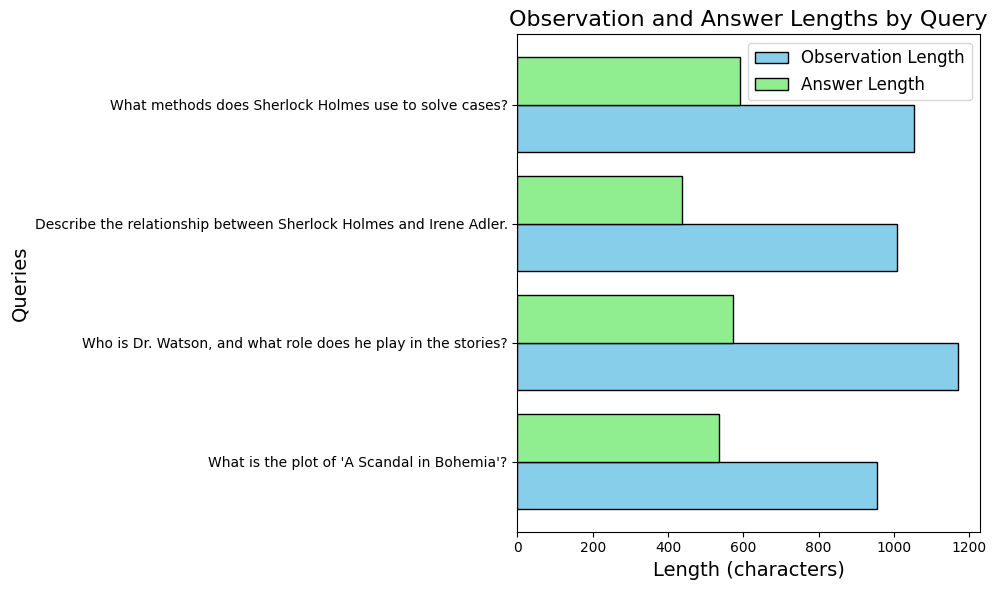

In [17]:
def visualize_lengths_with_queries(df):
    """Visualizes the lengths of observations and answers with queries on the y-axis."""
    df["Observation Length"] = df["Observation"].apply(len)
    df["Answer Length"] = df["Final Answer"].apply(len)

    # Extract relevant data
    queries = df["Action Input"]
    observation_lengths = df["Observation Length"]
    answer_lengths = df["Answer Length"]

    # Create a horizontal bar chart
    plt.figure(figsize=(10, 6))
    bar_width = 0.4
    y_pos = range(len(queries))

    plt.barh(y_pos, observation_lengths, bar_width, label="Observation Length", color="skyblue", edgecolor="black")
    plt.barh([y + bar_width for y in y_pos], answer_lengths, bar_width, label="Answer Length", color="lightgreen", edgecolor="black")

    plt.yticks([y + bar_width / 2 for y in y_pos], queries, fontsize=10)
    plt.xlabel("Length (characters)", fontsize=14)
    plt.ylabel("Queries", fontsize=14)
    plt.title("Observation and Answer Lengths by Query", fontsize=16)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Call the visualization function
visualize_lengths_with_queries(df)


This function, `visualize_lengths_with_queries`, creates a horizontal bar chart to compare the lengths of observations (retrieved context) and answers (generated responses) for each query. 

It calculates the character lengths of both observations and answers, adding them as new columns (`Observation Length` and `Answer Length`) to the DataFrame. Using `matplotlib`, it then plots these lengths for each query, with queries displayed on the y-axis for better readability. 

The bar chart is color-coded to differentiate between observation and answer lengths, and includes labels, a legend, and a title for clarity. 

This visualization helps analyze the balance between the size of the retrieved context and the detail in the generated response, offering insights into how the agent processes and responds to queries.

### Visualize the Proportion of Text Used in Observations

This step visualizes how much of the total text processed by the agent is used in observations (retrieved context) compared to the remaining text. A pie chart is created to provide an intuitive representation of the proportion.

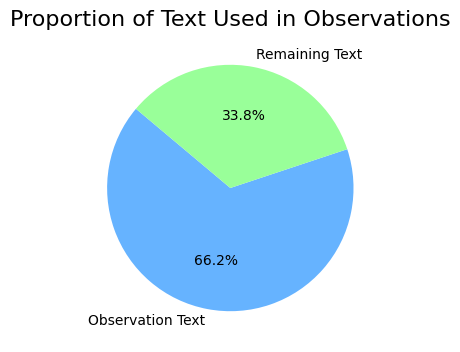

In [19]:
def visualize_text_proportion(df):
    """Visualizes the proportion of text used in observations."""
    total_text_length = sum(df["Observation"].apply(len)) + sum(df["Final Answer"].apply(len))
    observation_text_length = sum(df["Observation"].apply(len))

    sizes = [observation_text_length, total_text_length - observation_text_length]
    labels = ["Observation Text", "Remaining Text"]
    colors = ["#66b3ff", "#99ff99"]

    plt.figure(figsize=(4, 4))
    plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
    plt.title("Proportion of Text Used in Observations", fontsize=16)
    plt.show()

# Call the visualization function
visualize_text_proportion(df)

The `visualize_text_proportion` function creates a pie chart to illustrate the proportion of total text that is used in observations (retrieved context) compared to the remaining text. It calculates the total text length by summing the character lengths of all observations and answers and then determines the portion contributed by observations alone. 

This data is visualized in a pie chart, with clear labels for "Observation Text" and "Remaining Text" and distinct colors to enhance readability. The chart includes percentage values to make the proportions easy to interpret. 

This visualization provides a high-level overview of how much text the agent uses as context during query processing, offering insights into the efficiency and focus of the retrieval process.

### Generate Word Clouds for Observations and Final Answers

This code generates two word clouds to visually represent the most frequently occurring words in the Observation and Final Answer texts.

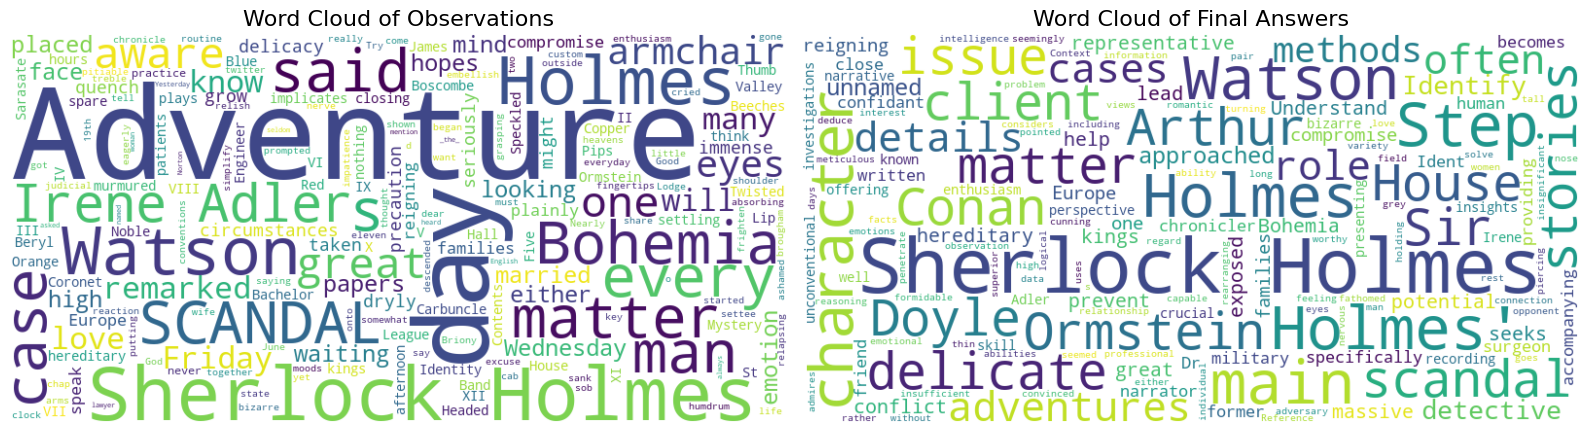

In [20]:

def generate_wordclouds_side_by_side(df):
    """Generates and displays word clouds for Observations and Final Answers side by side."""
    # Combine text for Observations and Final Answers
    observation_text = " ".join(df["Observation"])
    final_answer_text = " ".join(df["Final Answer"])

    # Create word clouds
    observation_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(observation_text)
    final_answer_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(final_answer_text)

    # Create a side-by-side visualization
    plt.figure(figsize=(16, 8))

    # Plot the Observation word cloud
    plt.subplot(1, 2, 1)
    plt.imshow(observation_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Observations", fontsize=16)

    # Plot the Final Answer word cloud
    plt.subplot(1, 2, 2)
    plt.imshow(final_answer_wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title("Word Cloud of Final Answers", fontsize=16)

    plt.tight_layout()
    plt.show()

# Call the function to generate and display the word clouds
generate_wordclouds_side_by_side(df)


This code generates two word clouds to visually represent the most frequently occurring words in the `Observation` and `Final Answer` texts, displaying them side by side for easy comparison. The `Observation` and `Final Answer` texts are first concatenated into two separate strings using `" ".join()` to combine all rows from the respective columns. The `WordCloud` library is then used to generate word clouds for each text with specific configurations. 

To create a side-by-side visualization, subplots are used: the first subplot displays the word cloud for `Observation`, and the second displays the one for `Final Answer`. The `tight_layout()` function ensures neat spacing between the plots. These word clouds allow us to intuitively analyze the agent’s performance by highlighting key terms retrieved from the context (`Observation`) and those emphasized in the responses (`Final Answer`).

# Test the Accuracy of the Agent

In this section, we evaluate the agent's performance using multiple accuracy metrics: **Keyword Matching**, **BLEU Scores**, **Precision/Recall**, and **F1 Scores**. These metrics provide a comprehensive view of how well the agent generates accurate and relevant responses based on user queries. 

### Import Required Libraries

Before we begin the tests, we import the necessary libraries for accuracy evaluation.

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.translate.bleu_score import sentence_bleu
from sklearn.metrics import precision_score, recall_score

These libraries include tools for keyword matching, BLEU score calculation, and precision/recall evaluation. Ensure you have installed these libraries in your environment to avoid import errors.

### Keyword Matching Accuracy

This test evaluates how well the generated answers include the keywords from the queries. It uses `CountVectorizer` to tokenize and extract keywords from the queries and answers. The function calculates the proportion of query keywords present in the generated answer, marking the response as accurate if this proportion exceeds a threshold (0.5 by default). The results are added to the DataFrame under the `Keyword Match Score` and `Is Accurate columns`.

In [22]:
def keyword_matching_accuracy(df):
    """Checks if key phrases from the query are present in the final answer."""
    vectorizer = CountVectorizer(stop_words='english')
    
    def check_keywords(query, answer):
        query_keywords = set(vectorizer.build_tokenizer()(query.lower()))
        answer_keywords = set(vectorizer.build_tokenizer()(answer.lower()))
        common_keywords = query_keywords & answer_keywords
        return len(common_keywords) / len(query_keywords)  # Proportion of matched keywords

    df["Keyword Match Score"] = df.apply(lambda row: check_keywords(row["Action Input"], row["Final Answer"]), axis=1)
    df["Is Accurate"] = df["Keyword Match Score"] >= 0.5  # Set a threshold for accuracy
    return df

# Apply keyword matching
df = keyword_matching_accuracy(df)
df.to_csv("output_with_accuracy.csv", index=False)

### BLEU Score Calculation

This test measures how closely the generated answers match the retrieved observations. BLEU (Bilingual Evaluation Understudy) is a popular metric for evaluating text similarity based on n-gram overlaps. The function computes `BLEU scores` for each query-answer pair and appends them to the DataFrame under the BLEU Score column.

In [23]:
def calculate_bleu_scores(df):
    """Calculates BLEU scores for answers against observations."""
    df["BLEU Score"] = df.apply(
        lambda row: sentence_bleu([row["Observation"].split()], row["Final Answer"].split()),
        axis=1
    )
    return df

# Apply BLEU score calculation
df = calculate_bleu_scores(df)
df.to_csv("output_with_bleu.csv", index=False)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)


### Precision and Recall

Precision and recall are calculated to evaluate the relevance and completeness of the answers. Precision measures the proportion of retrieved words in the answer that are relevant, while recall measures the proportion of relevant words in the observation that appear in the answer. These metrics are appended to the DataFrame under the `Precision` and `Recall` columns.

In [24]:
def calculate_precision_recall(df):
    """Calculates precision and recall for extractive answers."""
    def precision_recall(observation, answer):
        observation_set = set(observation.lower().split())
        answer_set = set(answer.lower().split())
        precision = len(observation_set & answer_set) / len(answer_set) if answer_set else 0
        recall = len(observation_set & answer_set) / len(observation_set) if observation_set else 0
        return precision, recall

    df[["Precision", "Recall"]] = df.apply(
        lambda row: pd.Series(precision_recall(row["Observation"], row["Final Answer"])),
        axis=1
    )
    return df

# Apply precision/recall
df = calculate_precision_recall(df)
df.to_csv("output_with_precision_recall.csv", index=False)


### F1 Score Calculation

The F1 Score combines precision and recall into a single metric, providing a balanced evaluation of relevance and completeness. The formula for F1 Score is:

**F1 Score** = `2 * (Precision * Recall) / (Precision + Recall)`

The calculated F1 scores are added to the DataFrame under the F1 Score column.

In [25]:
def calculate_f1(df):
    """Calculates F1 scores based on precision and recall."""
    df["F1 Score"] = 2 * (df["Precision"] * df["Recall"]) / (df["Precision"] + df["Recall"])
    df["F1 Score"].fillna(0, inplace=True)  # Handle divide by zero
    return df

# Apply F1 calculation
df = calculate_f1(df)
df.to_csv("output_with_f1.csv", index=False)


### Summarize Accuracy Metrics

Finally, a summary function consolidates all the metrics to provide an overview of the agent's performance. It calculates the total number of queries, the count and percentage of accurate responses, and the average BLEU and F1 scores.

In [26]:
def summarize_accuracy_metrics(df):
    """Summarizes overall accuracy metrics."""
    total_entries = len(df)
    accurate_entries = df["Is Accurate"].sum()
    average_bleu = df["BLEU Score"].mean()
    average_f1 = df["F1 Score"].mean()

    print(f"Total Entries: {total_entries}")
    print(f"Accurate Entries: {accurate_entries} ({accurate_entries / total_entries * 100:.2f}%)")
    print(f"Average BLEU Score: {average_bleu:.2f}")
    print(f"Average F1 Score: {average_f1:.2f}")

# Call summary function
summarize_accuracy_metrics(df)

Total Entries: 4
Accurate Entries: 4 (100.00%)
Average BLEU Score: 0.03
Average F1 Score: 0.23


These accuracy tests offer a detailed evaluation of the agent’s ability to generate relevant and accurate responses. Each test focuses on a specific aspect, from keyword inclusion (Test 1) to text similarity (Test 2) and response completeness (Test 3 and Test 4). The summary consolidates these metrics to give an overall performance snapshot.

# Summary

This tutorial guided you through building an autonomous agent powered by IBM’s Granite LLM and LangChain. Starting from text extraction to vectorization and query resolution, we covered the entire process of designing and implementing a functional LLM-based agent. Key steps included memory management with vector stores, query processing, and generating responses using Granite.

We evaluated the agent’s performance using accuracy metrics such as Keyword Matching, BLEU Scores, Precision, Recall, and F1 Scores. Visualizations like bar charts, pie charts, and word clouds provided additional insights into the agent’s behavior and effectiveness.

By completing this tutorial, you’ve learned how to design, test, and visualize an LLM agent's performance. This foundation can be extended to tackle more complex datasets, improve accuracy, and explore advanced features like multi-agent systems.

# Footnotes

[1] Wang, L., Ma, C., Feng, X. et al. A survey on large language model based autonomous agents. Front. Comput. Sci. 18, 186345 (2024). https://doi.org/10.1007/s11704-024-40231-1